Analysis of Red Wine Data by fitting ML models with regularization.

Data obtained from https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

Begin by loading the data and converting the quality of wine to a binary variable.

In [26]:
# load and inspect data
data = pd.read_csv('winequality-red.csv', delimiter=";")
print(data.info())
print(data.columns)

# quality on scale from 1-10, 5 or less is bad (=0), 6 or more is good (=1)
data['quality'] = (data['quality']/10).round()

# assign input and output variables
features = data.drop(columns = ['quality'])
y = data['quality']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', '

Now scale the data for analysis and split into training and test datasets.

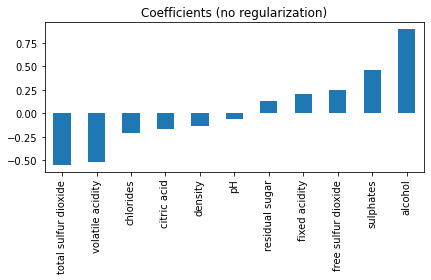

Training score for the unregularized model is: 0.7727598566308242
Test score for the unregularized model is: 0.7266666666666667


<Figure size 432x288 with 0 Axes>

In [31]:
# scale features
ss_fit = StandardScaler().fit(features)
X = ss_fit.transform(features)

# 80:20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

First we will fit a logisistic regression model with no regularization applied.

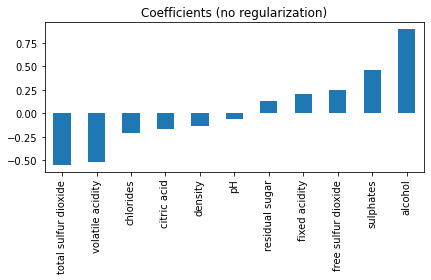

Training score for the unregularized model is: 0.7727598566308242
Test score for the unregularized model is: 0.7266666666666667


<Figure size 432x288 with 0 Axes>

In [33]:
# logistic regression with no regularization
clf_no_reg = LogisticRegression(penalty = 'none')
clf_no_reg.fit(X_train, y_train)

# plot coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

# find f1_score of model
y_pred_train = clf_no_reg.predict(X_train)
y_pred_test = clf_no_reg.predict(X_test)
print(f"Training score for the unregularized model is: {f1_score(y_train, y_pred_train)}")
print(f"Test score for the unregularized model is: {f1_score(y_test, y_pred_test)}")

Now fit a logistic regression model with Ridge regularization.

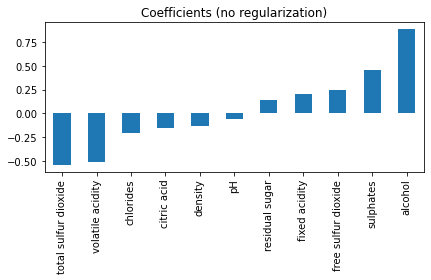

Training score for the L2 regularized model is: 0.7727598566308242
Test score for the L2 regularized model is: 0.7266666666666667


<Figure size 432x288 with 0 Axes>

In [34]:
# logistic regression with L2 regularization
clf_default = LogisticRegression(penalty = 'l2')
clf_default.fit(X_train, y_train)

# plot coefficients
predictors = features.columns
coefficients = clf_default.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

# find f1_score of model
y_pred_train = clf_default.predict(X_train)
y_pred_test = clf_default.predict(X_test)
print(f"Training score for the L2 regularized model is: {f1_score(y_train, y_pred_train)}")
print(f"Test score for the L2 regularized model is: {f1_score(y_test, y_pred_test)}")

The L2 regularization had no effect on the performance of the model compared to the unregularized model implying the hyperparameter is not suitable. We will hence perform hyperparameter tuning to optimize the model.

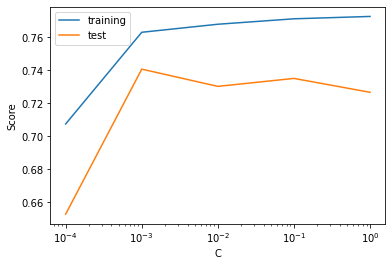

<Figure size 432x288 with 0 Axes>

In [39]:
# try various values of the hyperparameter C and get training/test scores for each
training_scores = []
test_scores = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for c in C_array:
    clf = LogisticRegression(C = c, penalty = 'l2')
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    training_scores.append(f1_score(y_train, y_pred_train))
    test_scores.append(f1_score(y_test, y_pred_test))

# plot training/test scores for each value of C
plt.plot(C_array, training_scores, label = 'Training')
plt.plot(C_array, test_scores, label = 'Test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()
plt.show()
plt.clf()

From inspection of the graph, the optimal parameter C appears to be somewhere around 0.001 so we will tune in the range of 0.0001 to 0.01.

In [44]:
# set up dictionary of possible values of C in range
tuning_C = {'C': np.logspace(-4, -2, 100)}

# set up grid search model, 5 fold cross validation
gs = GridSearchCV(LogisticRegression(), param_grid = tuning_C, scoring='f1', cv = 5)
gs.fit(X_train, y_train)

# display best C value and score
print(gs.best_params_, gs.best_score_)

# fit logistic regression model with C value found
clf_best = LogisticRegression(C = gs.best_params_['C'], penalty = 'l2')
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
print(f"Test score on best C value: {f1_score(y_test, y_pred_best)}")

{'C': 0.0019630406500402726} 0.7723336222647887
Test score on best C value: 0.7407407407407408


We will now use Lasso regularization to select features from the model.

[0.25950242] [[ 0.11651108 -0.55639063 -0.17271036  0.03123756 -0.17327908  0.20051238
  -0.50582828  0.         -0.07044546  0.43223595  0.9410251 ]]


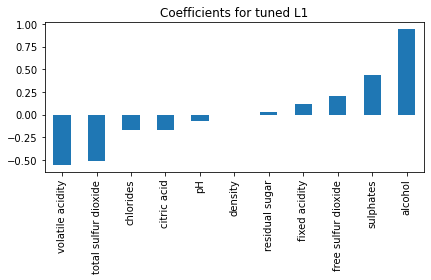

<Figure size 432x288 with 0 Axes>

In [51]:
# fit logistic regression with L1 regularization
clf_l1 = LogisticRegressionCV(Cs = np.logspace(-2, 2, 100), 
                              cv = 5,
                              penalty = 'l1',
                              solver = 'liblinear',
                              scoring = 'f1')
clf_l1.fit(X, y)

# display best C value and coefficients
print(clf_l1.C_, clf_l1.coef_)

# display coefficient plot 
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values() 
plt.figure(figsize = (6,4))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()